# 🌍 Jour 11 : Introduction aux Données Spatiales avec `geopandas`

Dans cette séance, nous découvrons comment manipuler et visualiser des données géographiques (cartographiques) en Python avec la bibliothèque `geopandas`.

📌 Objectifs :
- Comprendre les objets géométriques (`Point`, `Polygon`, `GeoSeries`, etc.)
- Charger des shapefiles ou GeoJSON
- Visualiser des cartes
- Joindre des données statistiques à des entités géographiques

In [32]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## 🗺️ Chargement d’un jeu de données spatial intégré

In [53]:
# If the built-in dataset is not available, download and use the shapefile manually:
# Download from: https://www.naturalearthdata.com/downloads/110m-cultural-vectors/
# Unzip and provide the path to the .shp file, for example:
world = gpd.read_file("../Dataset/maps/ne_110m_admin_0_countries.shp")

world.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,Unrecognized,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312..."


## 🗾 Affichage simple de la carte du monde

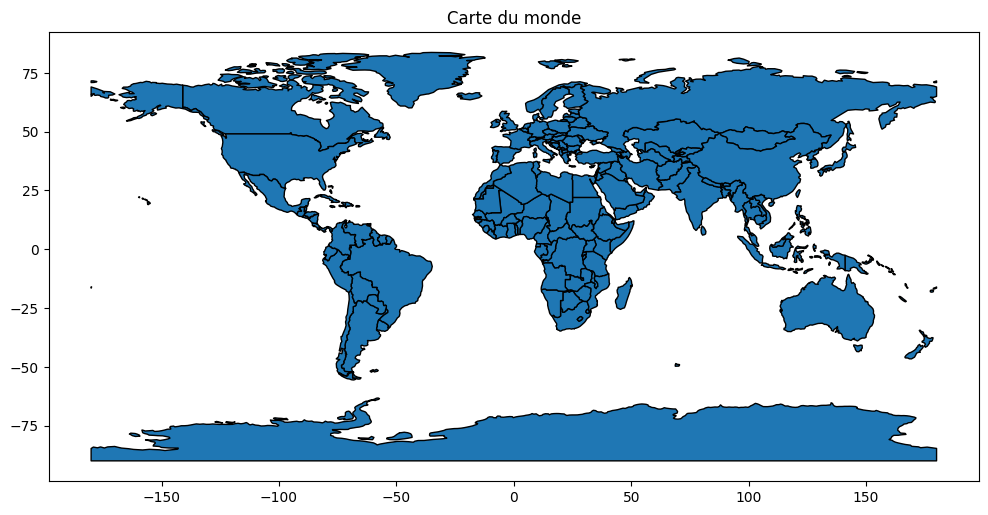

In [54]:
world.plot(figsize=(12, 6), edgecolor='black')
plt.title('Carte du monde')
plt.show()

## 🔍 Focus par continent

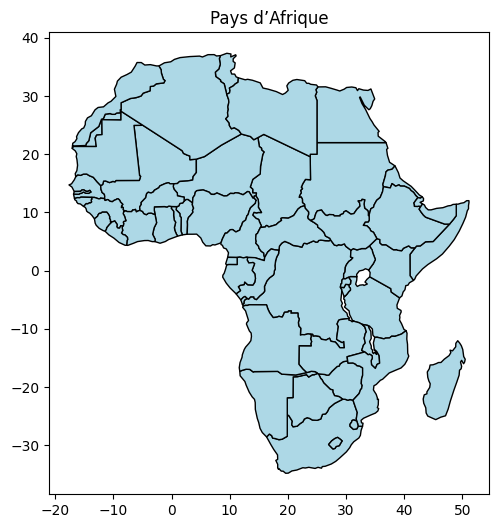

In [26]:
# Afrique
africa = world[world['CONTINENT'] == 'Africa']
africa.plot(figsize=(10, 6), color='lightblue', edgecolor='black')
plt.title('Pays d’Afrique')
# Asie
"""asia = world[world['CONTINENT'] == 'Asia']
asia.plot(figsize=(10, 6), color='lightgreen', edgecolor='black')
plt.title('Pays d’Asie')"""
# Amériques
"""americas = world[world['CONTINENT'] == 'North America']
americas = pd.concat([americas, world[world['CONTINENT'] == 'South America']])
americas.plot(figsize=(10, 6), color='lightcoral', edgecolor='black')
plt.title('Pays des Amériques')"""
# Europe
"""europe = world[world['CONTINENT'] == 'Europe']
europe.plot(figsize=(10, 6), color='yellow', edgecolor='black')
plt.title('Pays d’Europe')"""
# Océanie
"""oceania = world[world['CONTINENT'] == 'Oceania']
oceania.plot(figsize=(10, 6), color='cyan', edgecolor='black')
plt.title('Pays d’Océanie')"""
plt.show()

## 🔗 Jointure avec des données statistiques

c:\Users\Destin Biringanine\AppData\Local\Programs\Python\Python312\Lib\site-packages\geopandas\geodataframe.py:1968: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


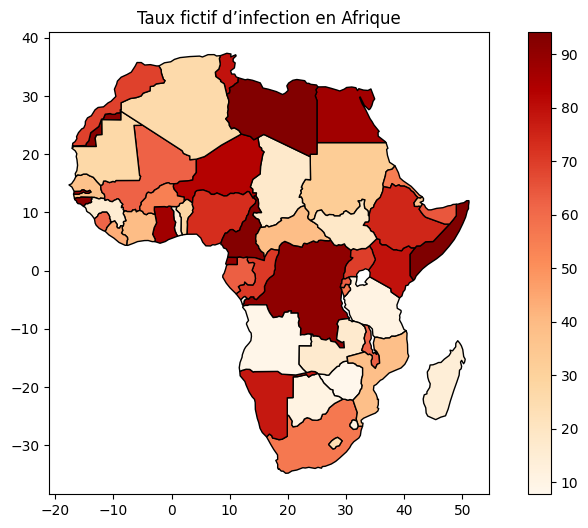

In [35]:
# Exemple : ajout d’une variable fictive 'infection_rate'
africa['infection_rate'] = np.random.uniform(0, 100, size=len(africa))
africa.plot(column='infection_rate', cmap='OrRd', legend=True, figsize=(10, 6), edgecolor='black')
plt.title('Taux fictif d’infection en Afrique')
plt.show()

## Focus on a country (e.g., Democratic Republic of the Congo)

In [43]:
for i in world["SOVEREIGNT"]:
    print(i)

Fiji
United Republic of Tanzania
Western Sahara
Canada
United States of America
Kazakhstan
Uzbekistan
Papua New Guinea
Indonesia
Argentina
Chile
Democratic Republic of the Congo
Somalia
Kenya
Sudan
Chad
Haiti
Dominican Republic
Russia
The Bahamas
United Kingdom
Norway
Denmark
France
East Timor
South Africa
Lesotho
Mexico
Uruguay
Brazil
Bolivia
Peru
Colombia
Panama
Costa Rica
Nicaragua
Honduras
El Salvador
Guatemala
Belize
Venezuela
Guyana
Suriname
France
Ecuador
United States of America
Jamaica
Cuba
Zimbabwe
Botswana
Namibia
Senegal
Mali
Mauritania
Benin
Niger
Nigeria
Cameroon
Togo
Ghana
Ivory Coast
Guinea
Guinea-Bissau
Liberia
Sierra Leone
Burkina Faso
Central African Republic
Republic of the Congo
Gabon
Equatorial Guinea
Zambia
Malawi
Mozambique
eSwatini
Angola
Burundi
Israel
Lebanon
Madagascar
Israel
Gambia
Tunisia
Algeria
Jordan
United Arab Emirates
Qatar
Kuwait
Iraq
Oman
Vanuatu
Cambodia
Thailand
Laos
Myanmar
Vietnam
North Korea
South Korea
Mongolia
India
Bangladesh
Bhutan
Nepal
P

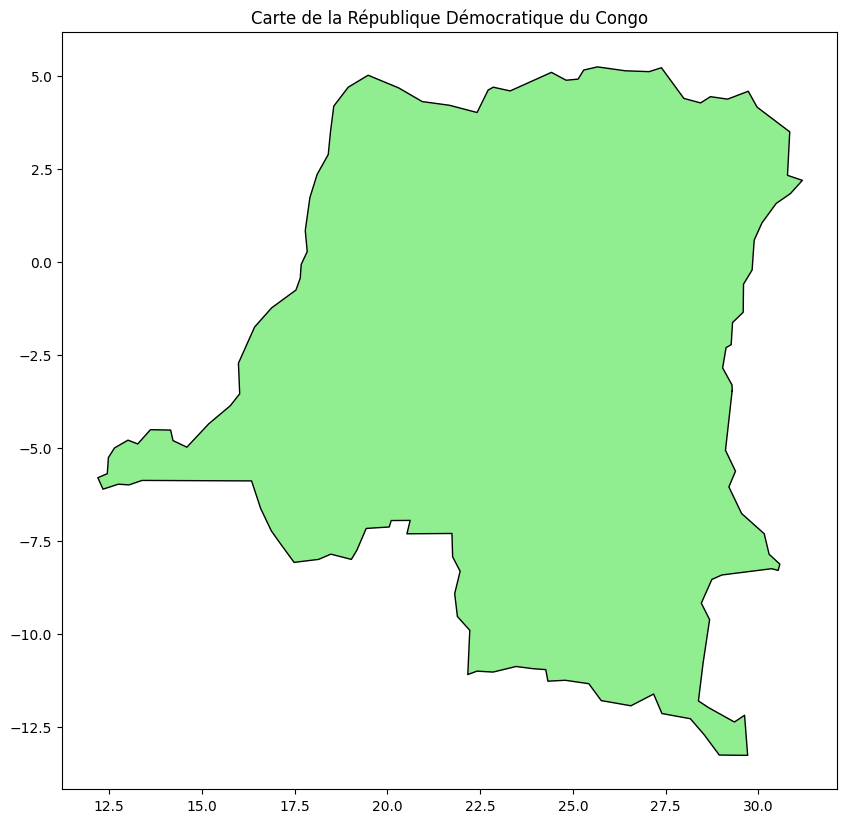

In [44]:
# Carte de la RDC
rdc = world[world['SOVEREIGNT'] == 'Democratic Republic of the Congo']
rdc.plot(figsize=(10, 10), color='lightgreen', edgecolor='black')
plt.title('Carte de la République Démocratique du Congo')
plt.show()

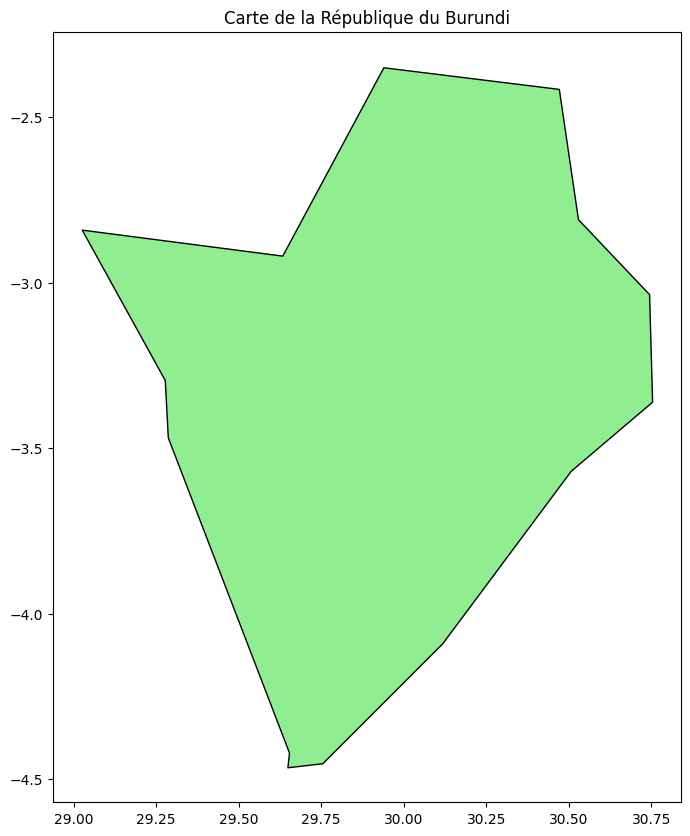

In [46]:
# Carte du Burundi
bur = world[world['SOVEREIGNT'] == 'Burundi']
bur.plot(figsize=(10, 10), color='lightgreen', edgecolor='black')
plt.title('Carte de la République du Burundi')
plt.show()

## 🔍 upload d'une carte provincial de la RDC

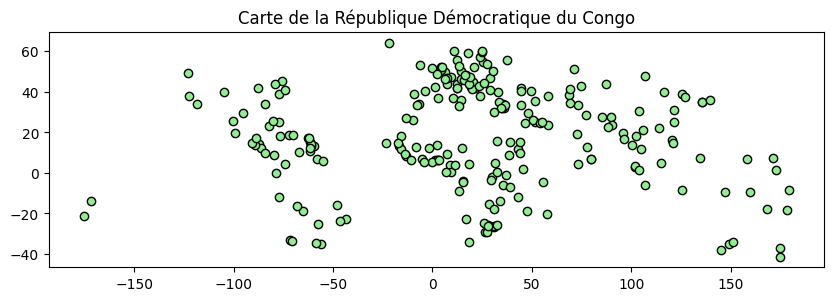

In [ ]:
# Carte de la RDC avec les provinces
# Download the DRC maps : https://simplemaps.com/static/svg/country/cd/admin1/cd_shp.zip
word_provinces = gpd.read_file("../Dataset/maps/ne_110m_populated_places.shp")
rdc_provinces = world[world['SOVEREIGNT'] == 'Democratic Republic of the Congo']
word_provinces.plot(figsize=(10, 10), color='lightgreen', edgecolor='black')
plt.title('Carte de la République Démocratique du Congo')
plt.show()

## 📝 Exercices
- Trouvez les 5 pays africains avec les plus hauts taux d’infection.
- Téléchargez un shapefile de votre pays (ex : provinces) et visualisez-le.
- Ajoutez une donnée statistique (ex : population, PIB) et cartographiez-la.